# **UK Time Use Survey 2014-2015**

The United Kingdom Time Use Survey, 2014-2015 (UKTUS) is a large-scale household survey that provides data on how people aged 8 years and over in the UK spend their time. (Dataset available at https://beta.ukdataservice.ac.uk/datacatalogue/studies/study?id=8128). At the heart of the survey is a time diary instrument in which respondents record their daily activities. Time diaries record events sequences for prescribed periods, usually a single day. They are an effective means of capturing rich data on how people spend their time, their location throughout the day, and who they spend their time with. The sample was based on households, and household members eight years and over completed time-diaries for one weekday and one weekend day. In addition, those in paid work were asked to complete a weekly work schedule. All individuals who completed a time diary were invited to take part in an interview, and someone in the household was selected to take part in a household interview. These interviews provide additional demographic, economic, and social information about households and individuals

In [2]:
#loading all required libraries 
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn import decomposition, datasets
from sklearn import cluster, datasets, metrics
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
pd.set_option('float_format', '{:f}'.format)
from datetime import datetime, timedelta
%matplotlib inline
import seaborn as sns

# **1. Source and Description of data**

This data is downloaded from the official Website of UK Data Service (https://beta.ukdataservice.ac.uk/datacatalogue/studies/study?id=8128). The user manual for this data files and the dictionary for meaning of each variable for TUS can be found on the website.

The survey data is collected from 2014 to 2015. In our current dataset we have information for 170,842 UK respondents.

**1. Respondent Information:**

The respondent information contains the respondent's age, gender, marital status, employment status and income.

**2. Activity Data:**

The activity information contains information about the activity performed by respondent, where the respondent was and with whom when performing the activity. We also have the weightage column for the respondent. Since the survey are catered to various demographics we have weightage for each respondent's response to avoid skewed results.

First few rows are as follows:

In [3]:
finaldata = pd.read_csv("/content/finaldata.csv", low_memory=False)
finaldata.head()

,Household id,pnum,weightage,Gender from household grid,Economic activity status,DVAge,Marital status,How related to person 2,Citizenship: UK citizen,Number of adults in household,Number of children in household,Number of people in Household,Number of cars or vans,Total monthly household income,act1_1,act1_2,act1_3,act1_4,act1_5,act1_6,act1_7,act1_8,act1_9,act1_10,act1_11,act1_12,act1_13,act1_14,act1_15,act1_16,act1_17,act1_18,act1_19,act1_20,act1_21,act1_22,act1_23,act1_24,act1_25,act1_26,act1_27,act1_28,act1_29,act1_30,act1_31,act1_32,act1_33,act1_34,act1_35,act1_36,act1_37,act1_38,act1_39,act1_40,act1_41,act1_42,act1_43,act1_44,act1_45,act1_46,act1_47,act1_48,act1_49,act1_50,act1_51,act1_52,act1_53,act1_54,act1_55,act1_56,act1_57,act1_58,act1_59,act1_60,act1_61,act1_62,act1_63,act1_64,act1_65,act1_66,act1_67,act1_68,act1_69,act1_70,act1_71,act1_72,act1_73,act1_74,act1_75,act1_76,act1_77,act1_78,act1_79,act1_80,act1_81,act1_82,act1_83,act1_84,act1_85,act1_86,act1_87,act1_88,act1_89,act1_90,act1_91,act1_92,act1_93,act1_94,act1_95,act1_96,act1_97,act1_98,act1_99,act1_100,act1_101,act1_102,act1_103,act1_104,act1_105,act1_106,act1_107,act1_108,act1_109,act1_110,act1_111,act1_112,act1_113,act1_114,act1_115,act1_116,act1_117,act1_118,act1_119,act1_120,act1_121,act1_122,act1_123,act1_124,act1_125,act1_126,act1_127,act1_128,act1_129,act1_130,act1_131,act1_132,act1_133,act1_134,act1_135,act1_136,act1_137,act1_138,act1_139,act1_140,act1_141,act1_142,act1_143,act1_144,strata,psu,Episode time,Primary activity,Other activity 1,Other activity 2,Other activity 3,Location of activity,Whether used smartphone/tablet/laptop,Activity performed alone,activity With spouse/partner,activity With mother,activity With father,activity With child 0-7 years,activity With other person(s) (incl. child 8+ years),activity With other(s) you know outside of HH,activity With No co-presence reported,Level of enjoyment
0,11011202,1,0.828011,Female,In paid employment (full or part-time),48,Married and living with your/his/her husband/wife,Spouse,Yes,3,1,4,4,3000,110,110,110,110,110,110,110,110,110,110,110,8219,310,3210,3110,7241,210,3819,210,210,210,3310,3210,3210,3210,3210,3110,3110,3110,3110,7259,5140,5140,5140,5140,5140,7259,7259,7259,7259,7259,7259,3110,5140,5140,8120,8120,8120,8120,8120,8120,8120,8120,8120,210,210,210,210,210,210,9360,9360,9360,9360,9360,9360,3610,3610,3610,3610,3610,3610,3240,3240,3110,3110,3110,3110,7220,7220,7220,7220,7220,7220,210,210,210,210,210,8210,8210,8210,8210,8210,8210,8210,3130,3130,3130,3130,3130,5110,7220,7220,7220,7220,7220,7220,5110,5110,5110,5110,5110,5110,5110,5110,5110,5110,7220,7220,7220,7220,7220,7220,7220,7220,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,117,110,Sleep,NaN,NaN,nan,Home,not using device,Not reported,Reported,Not reported,Not reported,Not reported,Reported,Not reported,Co-presence reported,Very Much
1,11011203,1,1.134924,Male,Retired,75,Married and living with your/his/her husband/wife,Spouse,Yes,2,0,2,2,2500,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,111,3110,5120,5120,210,5120,5120,5120,210,300,300,300,300,3710,9890,9890,9890,3440,3440,3440,3440,3440,9890,9890,9890,9890,3110,210,210,210,210,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210,5120,210,210,8210,8210,8210,8210,8210,8210,8210,8210,8210,8110,3110,3110,3110,3110,7241,7241,7241,7241,3110,210,210,210,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210,7241,7241,7241,7241,7241,3430,3430,310,8120,8120,8120,110,110,110,110,110,110,110,110,110,110,110,110,300,110,110,110,110,110,110,110,110,300,110,110,110,110,110,117,210,Sleep,NaN,NaN,nan,Home,not using device,Not reported,Reported,Not reported,Not reported,Not reported,Not reported,Reported,Co-presence reported,Very Much
2,11011207,1,0.745875,Female,Retired,68,Married and living with your/his/her husband/wife,Spouse,Yes,2,0,2,1,1500,110,110,110,110,110,310,110,110,110,110,110,110,11

# **2. Preprocessing and Cleaning:**

The preprocessing and cleaning information can be found separately in another notebook, "UK Time Use Survey - Cleaning and Preprocessing".

# **3. Summary Statistics:**

We will perform a quick summary statistics for respondent information and activity data.

Converting every column in dataframe to appropriate data type.

In [4]:
# converting to appropriate data type
finaldata["Household id"] = finaldata["Household id"].astype("category")
finaldata["Gender from household grid"] = finaldata["Gender from household grid"].astype("category")
finaldata["Economic activity status"] = finaldata["Economic activity status"].astype("category")
finaldata["Marital status"] = finaldata["Marital status"].astype("category")
finaldata["Total monthly household income"] = finaldata["Total monthly household income"].astype("category")
finaldata["How related to person 2"] = finaldata["How related to person 2"].astype("category")
finaldata["Citizenship: UK citizen"] = finaldata["Citizenship: UK citizen"].astype("category")
finaldata["Primary activity"] = finaldata["Primary activity"].astype("category")
finaldata["Other activity 1"] = finaldata["Other activity 1"].astype("category")
finaldata["Other activity 2"] = finaldata["Other activity 2"].astype("category")
finaldata["Other activity 3"] = finaldata["Other activity 3"].astype("category")
finaldata["Location of activity"] = finaldata["Location of activity"].astype("category")
finaldata["Whether used smartphone/tablet/laptop"] = finaldata["Whether used smartphone/tablet/laptop"].astype("category")
finaldata["Activity performed alone"] = finaldata["Activity performed alone"].astype("category")
finaldata["activity With spouse/partner"] = finaldata["activity With spouse/partner"].astype("category")
finaldata["activity With mother"] = finaldata["activity With mother"].astype("category")
finaldata["activity With father"] = finaldata["activity With father"].astype("category")
finaldata["activity With child 0-7 years"] = finaldata["activity With child 0-7 years"].astype("category")
finaldata["activity With other person(s) (incl. child 8+ years)"] = finaldata["activity With other person(s) (incl. child 8+ years)"].astype("category")
finaldata["activity With other(s) you know outside of HH"] = finaldata["activity With other(s) you know outside of HH"].astype("category")
finaldata["activity With No co-presence reported"] = finaldata["activity With No co-presence reported"].astype("category")
finaldata["Level of enjoyment"] = finaldata["Level of enjoyment"].astype("category")

This is summary statistics for numerical variables.

In [5]:
finaldata.describe()

,pnum,weightage,DVAge,Number of adults in household,Number of children in household,Number of people in Household,Number of cars or vans,act1_1,act1_2,act1_3,act1_4,act1_5,act1_6,act1_7,act1_8,act1_9,act1_10,act1_11,act1_12,act1_13,act1_14,act1_15,act1_16,act1_17,act1_18,act1_19,act1_20,act1_21,act1_22,act1_23,act1_24,act1_25,act1_26,act1_27,act1_28,act1_29,act1_30,act1_31,act1_32,act1_33,act1_34,act1_35,act1_36,act1_37,act1_38,act1_39,act1_40,act1_41,act1_42,act1_43,act1_44,act1_45,act1_46,act1_47,act1_48,act1_49,act1_50,act1_51,act1_52,act1_53,act1_54,act1_55,act1_56,act1_57,act1_58,act1_59,act1_60,act1_61,act1_62,act1_63,act1_64,act1_65,act1_66,act1_67,act1_68,act1_69,act1_70,act1_71,act1_72,act1_73,act1_74,act1_75,act1_76,act1_77,act1_78,act1_79,act1_80,act1_81,act1_82,act1_83,act1_84,act1_85,act1_86,act1_87,act1_88,act1_89,act1_90,act1_91,act1_92,act1_93,act1_94,act1_95,act1_96,act1_97,act1_98,act1_99,act1_100,act1_101,act1_102,act1_103,act1_104,act1_105,act1_106,act1_107,act1_108,act1_109,act1_110,act1_111,act1_112,act1_113,act1_114,act1_115,act1_116,act1_117,act1_118,act1_119,act1_120,act1_121,act1_122,act1_123,act1_124,act1_125,act1_126,act1_127,act1_128,act1_129,act1_130,act1_131,act1_132,act1_133,act1_134,act1_135,act1_136,act1_137,act1_138,act1_139,act1_140,act1_141,act1_142,act1_143,act1_144,strata,psu,Episode time
count,3293.000000,3290.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000
mean,1.013362,0.980837,51.285758,1.887944,0.512602,2.400547,1.054358,223.046766,245.227452,345.467355,367.378378,359.432736,398.317643,392.701488,427.344671,468.023383,496.939569,525.497722,575.069238,649.885818,758.491345,863.132706,980.816884,1099.153356,1180.578804,1271.920134,1519.173094,1666.994230,1835.047070,2018.930459,2157.885211,2306.086547,2468.835105,2672.023990,2839.669602,3040.872760,3069.575767,3077.310963,3183.231704,3317.624355,3470.898876,3586.101427,3697.985727,3676.953234,3721.150015,3821.981780,3833.924081,3907.823565,3900.698148,3976.037352,3966.864258,3964.873064,4007.820225,4060.795627,4053.498633,3969.464318,3959.766171,3927.445490,3918.994230,3947.572730,3872.399636,3814.550865,3751.463407,3784.004251,3872.419678,3877.099909,4010.025509,4160.029456,4160.867598,

This is summary statistics for  categorical variables.

In [6]:
finaldata.describe(include="category")

,Household id,Gender from household grid,Economic activity status,Marital status,How related to person 2,Citizenship: UK citizen,Total monthly household income,Primary activity,Other activity 1,Other activity 2,Other activity 3,Location of activity,Whether used smartphone/tablet/laptop,Activity performed alone,activity With spouse/partner,activity With mother,activity With father,activity With child 0-7 years,activity With other person(s) (incl. child 8+ years),activity With other(s) you know outside of HH,activity With No co-presence reported,Level of enjoyment
count,3293,3293,3293,3287,2265,3293,3293,3293,71,5,0,3293,3293,3293,3293,3293,3293,3293,3293,3293,3293,2779
unique,3293,2,11,8,14,3,405,36,25,5,0,18,3,2,2,2,2,2,2,2,2,4
top,55051020,Female,In paid employment (full or part-time),Married and living with your/his/her husband/wife,Spouse,Yes,2000,Sleep,Unspecified radio listening,Socialising with family,NaN,Home,not using device,Not reported,Not reported,Not reported,Not reported,Not reported,Not reported,Not reported,Co-presence reported,Very Much
freq,1,1884,1538,1513,1441,3029,250,3102,11,1,NaN,3076,3028,2093,1714,3277,3286,3048,3126,3170,3024,1364


# **4. Utility Functions**
Utility functions to help coding and enhance code reusability.

**4.1 Get Average Time by Weightage**

Because TUS responses are weighted, we determine the average time spent using the weightage algorithm stated in the TUS user handbook.

In [7]:
# average daily minutes spent
def getAverageHours(dataframeObject, columnName):
    # create empty dataframe
    emptyDF = pd.DataFrame()
    nameList = []
    sumList = []

    for name, eachGroup in dataframeObject.groupby(columnName, observed=True):
        if sum(eachGroup["weightage"]) > 0:
            # name of activity
            nameList.append(name)

            # average time formula
            sumList.append(
                sum(eachGroup["Episode time"] * eachGroup["weightage"])
                / sum(eachGroup["weightage"])
            )

    emptyDF["Activity"] = nameList
    emptyDF["Weighted Minutes"] = sumList

    # sort the activities in descending order
    return emptyDF.sort_values("Weighted Minutes", ascending=False)

**4.2 Get Average Time by Weightage and GroupBy**

This Utility function organises the dataframe based on the input supplied to it, and then computes the average time for each group using the utility function defined in Section 4.1.

In [8]:
# average daily minutes spent
def getAverageHoursGroupedBy(dataFrameObject, groupColumn1, groupColumn2, limit=3):
    eachRowList = []

    # group by the column name
    for name, eachGroup in dataFrameObject.groupby(groupColumn1):

        # compute weighted time for each group
        weightedDf = getAverageHours(eachGroup, groupColumn2)

        # return the top results for each group based on limit specified
        rangeLimit = limit if limit < len(weightedDf) else len(weightedDf)

        for i in range(rangeLimit):
            dictionaryInfo = {}
            dictionaryInfo.update(
                Group=name,
                Activity=weightedDf.iloc[i]["Activity"],
                Weighted_Minutes=weightedDf.iloc[i]["Weighted Minutes"],
            )

            # store all the results for each group in common dataframe
            eachRowList.append(dictionaryInfo)

    return pd.DataFrame(eachRowList).set_index(["Group", "Activity"])

**4.3 Get Participation Percentage by Weightage**

Because TUS respondents are weighted, we compute the participation percentage of each activity using the percentage calculation stated in the TUS user handbook.




In [9]:
# average participation percentage
def getParticipationPercentage(dataframeObject, columnToAggregate):
    # create empty dataframe
    emptyDF = pd.DataFrame()
    nameList = []
    sumList = []

    # sum of all weights
    totalSum = sum(dataframeObject["weightage"])

    for name, eachGroup in dataframeObject.groupby(columnToAggregate, observed=True):
        # name of activity
        nameList.append(name)

        # percentage formula
        sumList.append((sum(eachGroup["weightage"]) / totalSum) * 100)

    emptyDF["Activity"] = nameList
    emptyDF["Participation Percentage"] = sumList

    # sort the activities in descending order
    return emptyDF.sort_values("Participation Percentage", ascending=False)

**4.4 Get Participation Percentage by Weightage and GroupBy**

This Utility function organises the dataframe based on the input supplied to it and then computes the percentage for each group using the utility function defined in section 4.3.

In [10]:
# average participation percentage grouped
def getParticipationPercentageGroupedBy(
    dataFrameObject, groupColumn1, groupColumn2, limit=3
):
    eachRowList = []

    # group by the column name
    for name, eachGroup in dataFrameObject.groupby(groupColumn1, observed=True):

        # compute weighted percentage for each group
        weightedDf = getParticipationPercentage(eachGroup, groupColumn2)

        # return the top results for each group based on limit specified
        rangeLimit = limit if limit < len(weightedDf) else len(weightedDf)

        for i in range(rangeLimit):
            dictionaryInfo = {}
            dictionaryInfo.update(
                Group=name,
                Activity=weightedDf.iloc[i]["Activity"],
                Percentage=weightedDf.iloc[i]["Participation Percentage"],
            )

            # store all the results for each group in common dataframe
            eachRowList.append(dictionaryInfo)

    return pd.DataFrame(eachRowList).set_index(["Group", "Activity"])

# **5. Analysis**

**5.1. Which activity is the most often performed in terms of time spent and frequency of performance?**

We want to discover which activity is the most popular in terms of average time spent performing it.

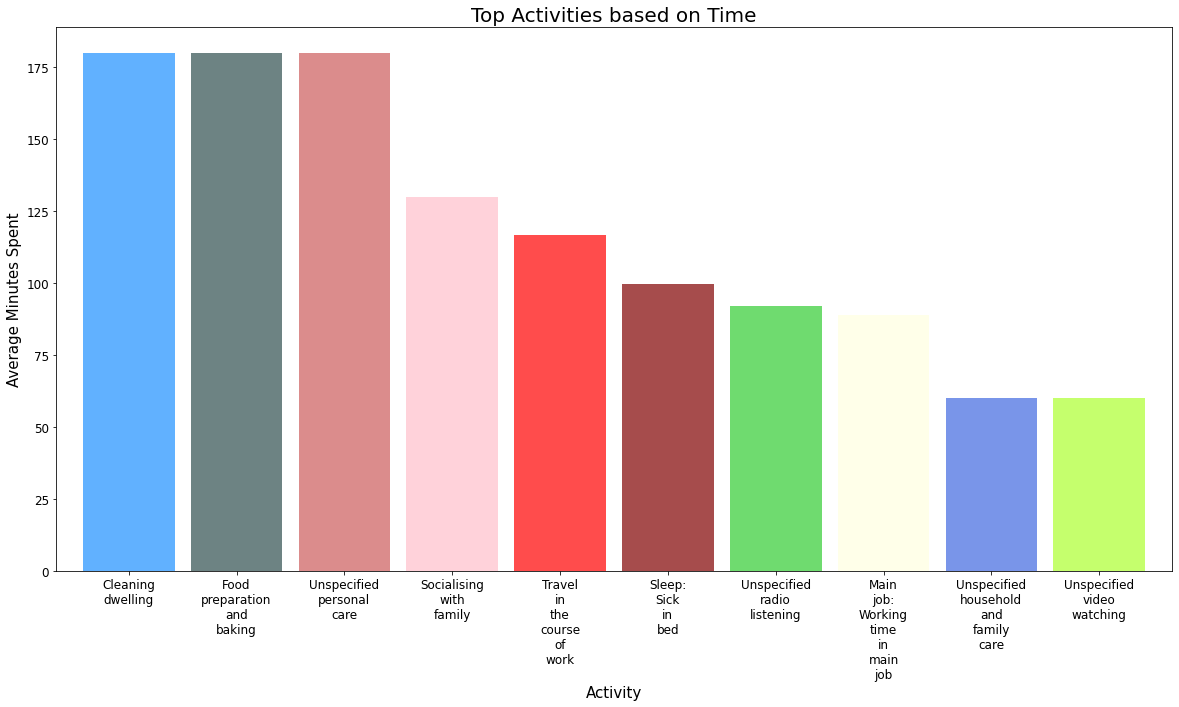

In [11]:
# get average time spent on activity using utility function
topActvity = getAverageHours(finaldata, "Primary activity").head(10)

# create bar plots
topTime = topActvity.plot.bar(
    figsize=(20, 10),
    title="Top Activities based on Time",
    x="Activity",
    y="Weighted Minutes",
    legend=False,
    fontsize=12,
    alpha=0.7,
    width=0.85,
    color=["#1E90FF","#2F4F4F","#CD5C5C","#FFC0CB","red", "#800000", "#32CD32", "#FFFFE0", "#4169E1", "#ADFF2F",],
)

# set the x ticks
topTime.set_xticklabels(
    # to wrap text, replace all spaces with new lines
    [x.replace(" ", "\n") for x in topActvity["Activity"]],
    rotation=0,
)

# set x axis label
topTime.set_xlabel("Activity", fontsize=15)

# set y axis label
topTime.set_ylabel("Average Minutes Spent", fontsize=15)

# set size of title
topTime.title.set_size(20)

plt.show()

Based on the above bar chart we notice, that most time spent doing an activity is cleaning dwelling, Unspecified personal care, followed by food preparation and baking activities, followed by travelling for work activities,socializing with family.

**5.2. Where do respondents spend the majority of their time based on their activities?**

We want to know where respondents spend the most of their time when engaging in an activity.

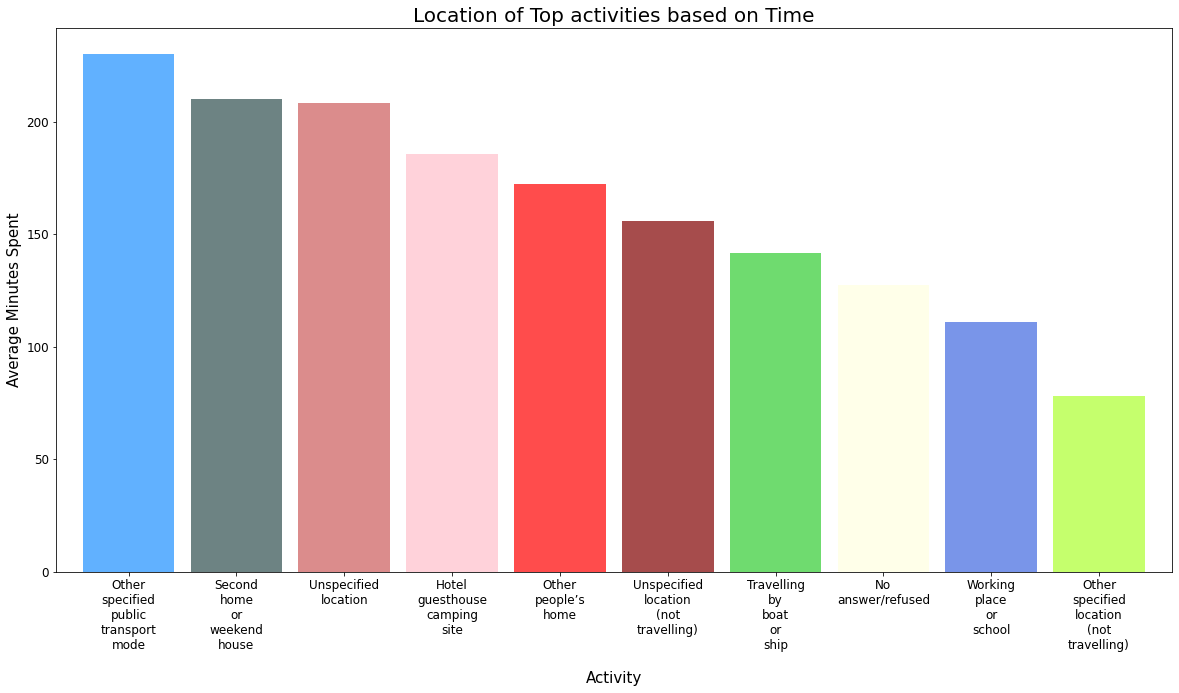

In [12]:
# get average time spent on activity using utility function
topActvity = getAverageHours(finaldata, "Location of activity").head(10)

# create bar plots
topTime = topActvity.plot.bar(
    figsize=(20, 10),
    title="Location of Top activities based on Time",
    x="Activity",
    y="Weighted Minutes",
    legend=False,
    fontsize=12,
    alpha=0.7,
    width=0.85,
    color=["#1E90FF","#2F4F4F","#CD5C5C","#FFC0CB","red", "#800000", "#32CD32", "#FFFFE0", "#4169E1", "#ADFF2F",],
)

# set the x ticks
topTime.set_xticklabels(
    # to wrap text, replace all spaces with new lines
    [x.replace(" ", "\n") for x in topActvity["Activity"]],
    rotation=0,
)

# set x axis label
topTime.set_xlabel("Activity", fontsize=15)

# set y axis label
topTime.set_ylabel("Average Minutes Spent", fontsize=15)

# set size of title
topTime.title.set_size(20)

plt.show()



**5.8. How does gender affect how respondents use their time?**

We'd like to know the top five activities in which respondents spend the most time based on their gender.

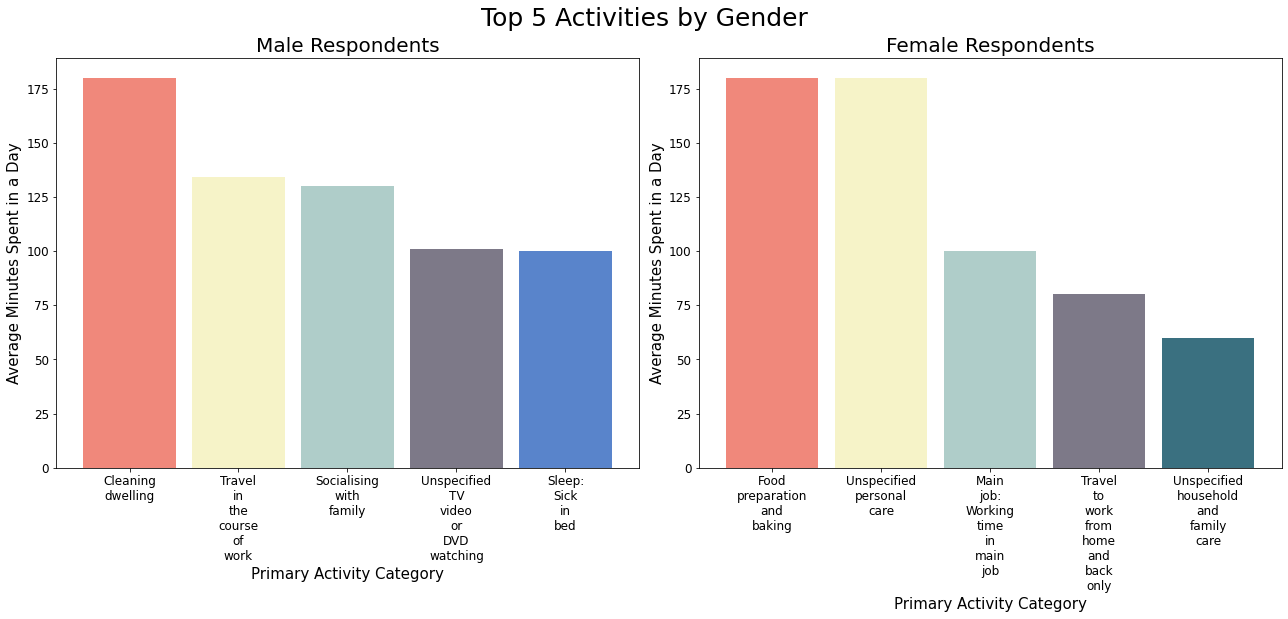

In [13]:
# get top 5 activities by average time grouped by sex using utility function
sexRespGroup = getAverageHoursGroupedBy(finaldata, "Gender from household grid", "Primary activity", 5)

# create subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))

# male subplot
axmale = (
    sexRespGroup.loc["Male"]
    .reset_index()
    .plot(
        kind="bar",
        x="Activity",
        y="Weighted_Minutes",
        ax=axes[0],  # index for subplot
        title="Male Respondents",
        legend=False,
        rot=90,
        fontsize=12,
        alpha=0.8,
        width=0.85,
        color=["#ED6A5A", "#F4F1BB", "#9BC1BC", "#5D576B", "#3066BE"],
    )
)
axmale.set_xticklabels(
    [
        # to wrap text, replace all spaces with new lines
        x.replace(" ", "\n")
        for x in sexRespGroup.loc["Male"].reset_index()["Activity"].to_list()
    ],
    rotation=0,
)
axmale.set_xlabel("Primary Activity Category", fontsize=15)
axmale.set_ylabel("Average Minutes Spent in a Day", fontsize=15)
axes[0].title.set_size(20)

# female subplot
axfemale = (
    sexRespGroup.loc["Female"]
    .reset_index()
    .plot(
        kind="bar",
        x="Activity",
        y="Weighted_Minutes",
        ax=axes[1],  # index for subplot
        title="Female Respondents",
        legend=False,
        rot=90,
        fontsize=12,
        alpha=0.8,
        width=0.85,
        color=["#ED6A5A", "#F4F1BB", "#9BC1BC", "#5D576B", "#084C61"],
    )
)
axfemale.set_xticklabels(
    [
        # to wrap text, replace all spaces with new lines
        x.replace(" ", "\n")
        for x in sexRespGroup.loc["Female"].reset_index()["Activity"].to_list()
    ],
    rotation=0,
)
axfemale.set_xlabel("Primary Activity Category", fontsize=15)
axfemale.set_ylabel("Average Minutes Spent in a Day", fontsize=15)
axes[1].title.set_size(20)

# common title for subplot
fig.suptitle("Top 5 Activities by Gender", size=25)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

We observe that only traveling for work are common for both men and women as their priority activities, but men have cleaning activities as one of their top activities whereas women have food preparation and baking activities as one of their top activities.

**5.7. How do respondents in different age categories spend their time?**

We want to know the top 5 activities in which most time was spent based on age category. We split the respondents into 4 categories: less than 30 years of age, 30 to 40 years, 40 to 60 years and greater than 60 years of age.

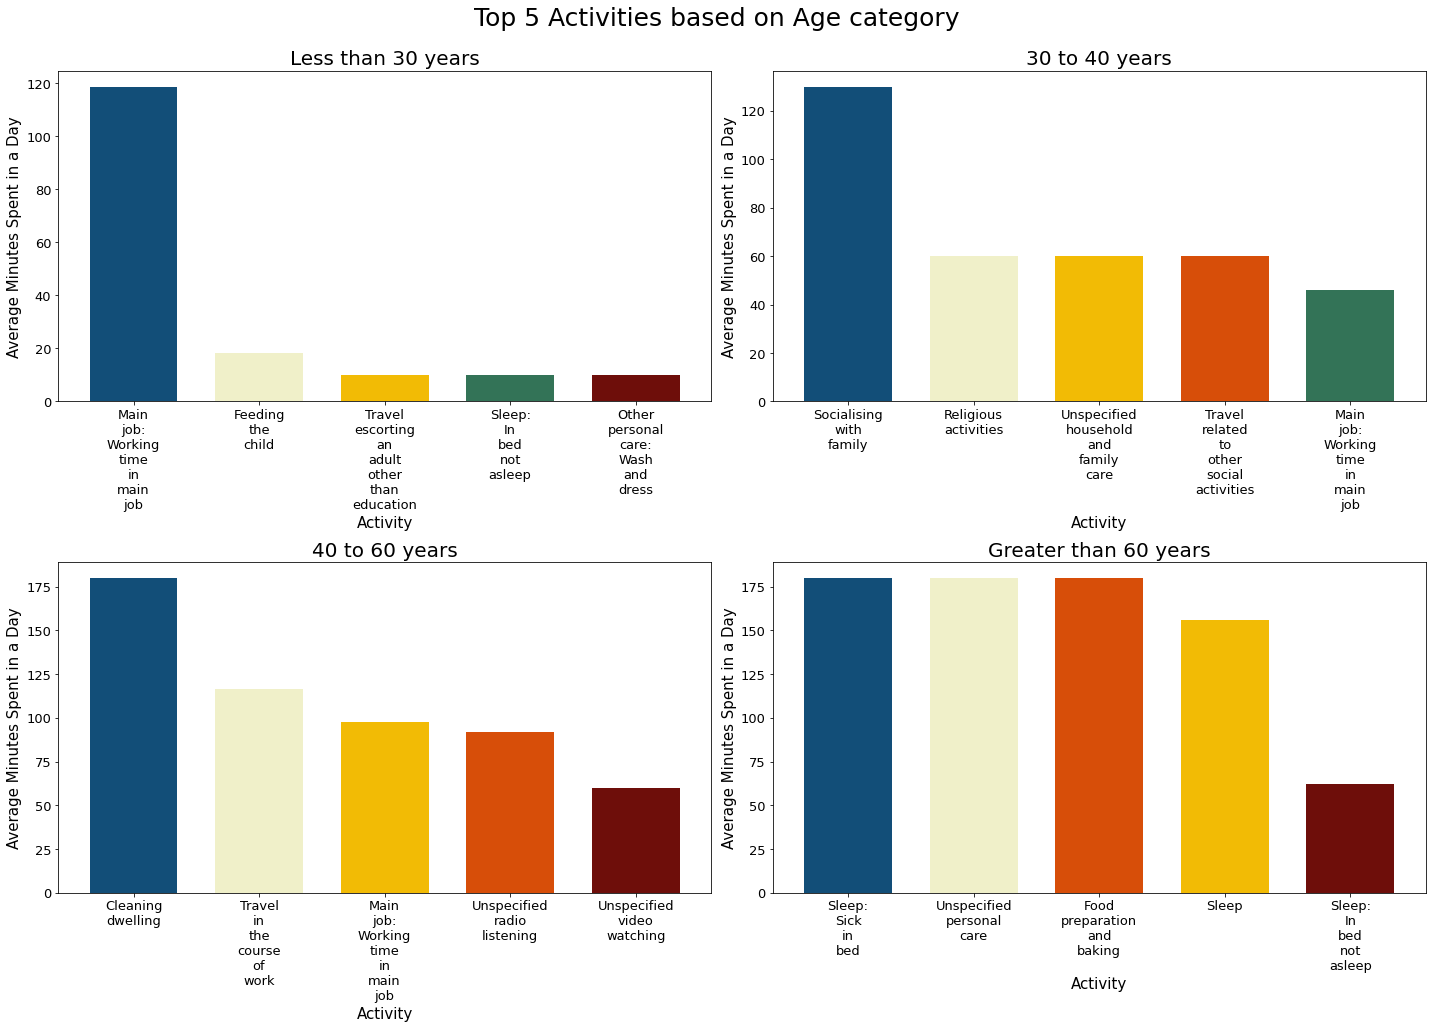

In [14]:
# split the respondents based on categories < 30, 30 to 40, 40 to 60, 60 >
finaldata["Age Category"] = np.where(
    finaldata["DVAge"] < 30,
    "<30",
    np.where(
        finaldata["DVAge"] < 40,
        "30 to 40",
        np.where(finaldata["DVAge"] < 60, "40 to 60", "60 >"),
    ),
)

# get top 5 activities by average time grouped by age category using utility function
ageRespGroup = getAverageHoursGroupedBy(finaldata, "Age Category", "Primary activity", 5)

# create subplot with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2)

# subplot for less than 30 years
axlt30 = (
    ageRespGroup.loc["<30"]
    .reset_index()
    .plot.bar(
        figsize=(20, 15),
        legend=False,
        width=0.7,
        fontsize=13,
        ax=axes[0, 0],  # index for subplot
        x="Activity",
        y="Weighted_Minutes",
        title="Less than 30 years",
        color=["#124E78", "#F0F0C9", "#F2BB05", "#337357", "#6E0E0A"],
    )
)
axlt30.set_xticklabels(
    [
        # to wrap text, replace all spaces with new lines
        x.replace(" ", "\n")
        for x in ageRespGroup.loc["<30"].reset_index()["Activity"].to_list()
    ],
    rotation=0,
)
axlt30.set_xlabel("Activity", fontsize=15)
axlt30.set_ylabel("Average Minutes Spent in a Day", fontsize=15)
axlt30.title.set_size(20)

ax30to40 = (
    ageRespGroup.loc["30 to 40"]
    .reset_index()
    .plot.bar(
        legend=False,
        width=0.7,
        fontsize=13,
        ax=axes[0, 1],
        x="Activity",
        y="Weighted_Minutes",
        title="30 to 40 years",
        rot=0,
        color=["#124E78", "#F0F0C9", "#F2BB05", "#D74E09", "#337357"],
    )
)
ax30to40.set_xticklabels(
    [
        x.replace(" ", "\n")
        for x in ageRespGroup.loc["30 to 40"].reset_index()["Activity"].to_list()
    ],
    rotation=0,
)
ax30to40.set_xlabel("Activity", fontsize=15)
ax30to40.set_ylabel("Average Minutes Spent in a Day", fontsize=15)
ax30to40.title.set_size(20)

ax40to60 = (
    ageRespGroup.loc["40 to 60"]
    .reset_index()
    .plot.bar(
        legend=False,
        width=0.7,
        fontsize=13,
        ax=axes[1, 0],
        x="Activity",
        y="Weighted_Minutes",
        title="40 to 60 years",
        rot=0,
        color=["#124E78", "#F0F0C9", "#F2BB05", "#D74E09", "#6E0E0A"],
    )
)
ax40to60.set_xticklabels(
    [
        x.replace(" ", "\n")
        for x in ageRespGroup.loc["40 to 60"].reset_index()["Activity"].to_list()
    ],
    rotation=0,
)
ax40to60.set_xlabel("Activity", fontsize=15)
ax40to60.set_ylabel("Average Minutes Spent in a Day", fontsize=15)
ax40to60.title.set_size(20)


axgt60 = (
    ageRespGroup.loc["60 >"]
    .reset_index()
    .plot.bar(
        legend=False,
        width=0.7,
        fontsize=13,
        ax=axes[1, 1],
        x="Activity",
        y="Weighted_Minutes",
        title="Greater than 60 years",
        rot=0,
        color=["#124E78", "#F0F0C9", "#D74E09", "#F2BB05", "#6E0E0A"],
    )
)
axgt60.set_xticklabels(
    [
        x.replace(" ", "\n")
        for x in ageRespGroup.loc["60 >"].reset_index()["Activity"].to_list()
    ],
    rotation=0,
)
axgt60.set_xlabel("Activity", fontsize=15)
axgt60.set_ylabel("Average Minutes Spent in a Day", fontsize=15)
axgt60.title.set_size(20)
fig.suptitle("Top 5 Activities based on Age category", size=25)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

We can see that every age group has different primary activity categories. Less than 30 years people tend to sleep more than work activities which is exactly the opposite case for people of age of 30 to 40 years. Since people with age more than 60 years are old people, they are more likely to be sick as compared to other activity categories.

**5.8. What is the degree of enjoyment for responders of various ages?**


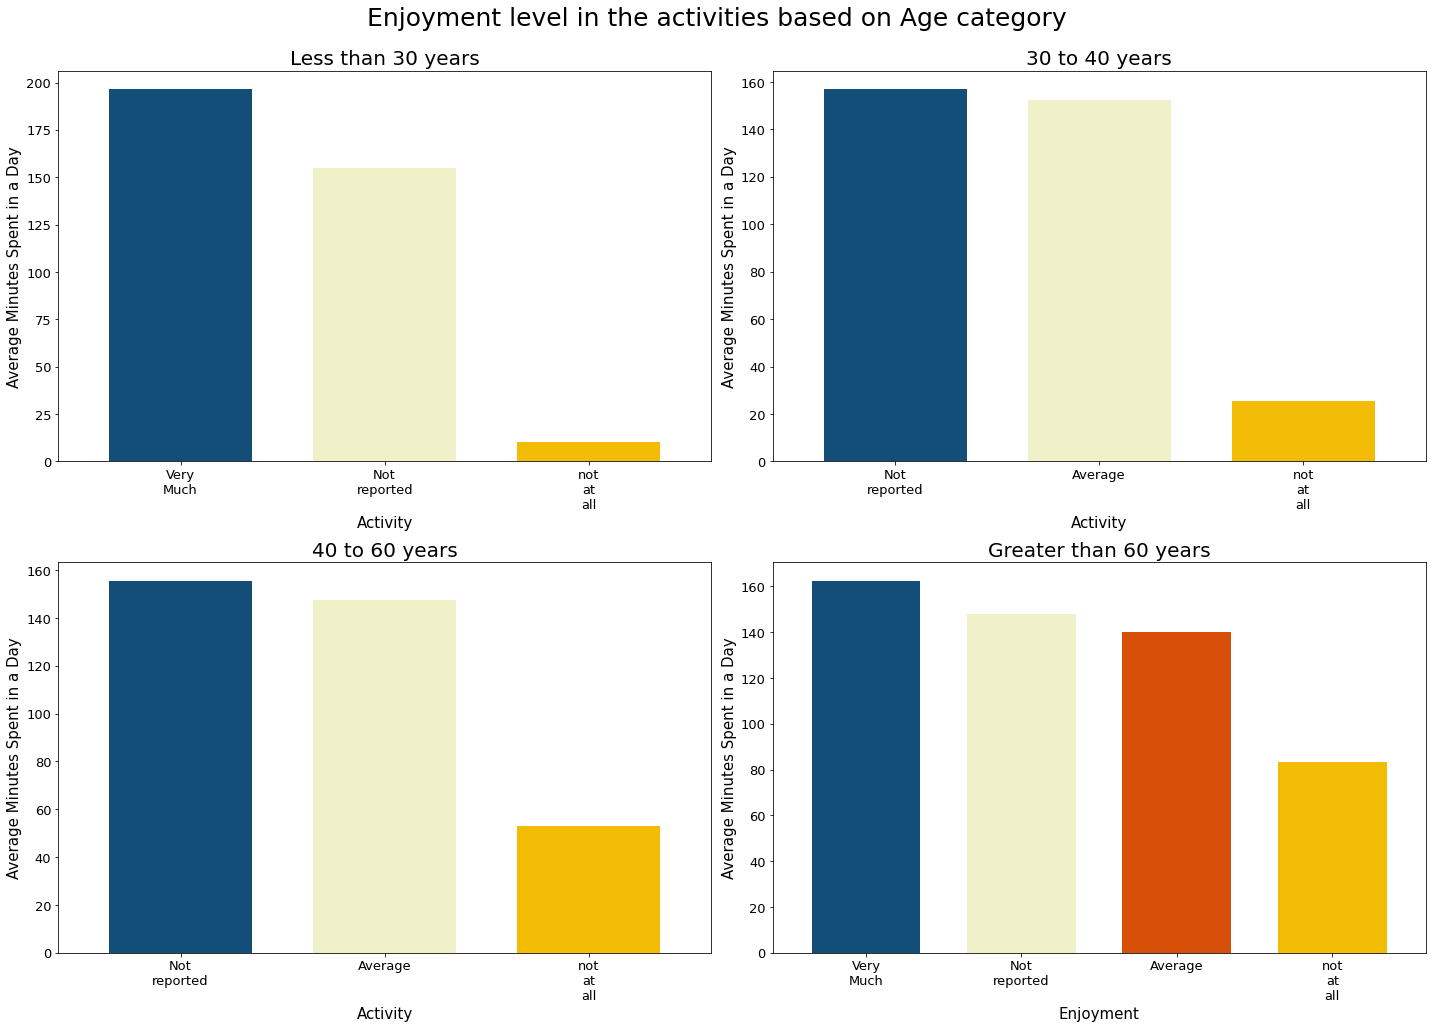

In [15]:
# split the respondents based on categories < 30, 30 to 40, 40 to 60, 60 >
finaldata["Age Category"] = np.where(
    finaldata["DVAge"] < 30,
    "<30",
    np.where(
        finaldata["DVAge"] < 40,
        "30 to 40",
        np.where(finaldata["DVAge"] < 60, "40 to 60", "60 >"),
    ),
)

# get top 5 activities by average time grouped by age category using utility function
ageRespGroup = getAverageHoursGroupedBy(finaldata, "Age Category", "Level of enjoyment", 5)

# create subplot with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2)

# subplot for less than 30 years
axlt30 = (
    ageRespGroup.loc["<30"]
    .reset_index()
    .plot.bar(
        figsize=(20, 15),
        legend=False,
        width=0.7,
        fontsize=13,
        ax=axes[0, 0],  # index for subplot
        x="Activity",
        y="Weighted_Minutes",
        title="Less than 30 years",
        color=["#124E78", "#F0F0C9", "#F2BB05", "#337357", "#6E0E0A"],
    )
)
axlt30.set_xticklabels(
    [
        # to wrap text, replace all spaces with new lines
        x.replace(" ", "\n")
        for x in ageRespGroup.loc["<30"].reset_index()["Activity"].to_list()
    ],
    rotation=0,
)
axlt30.set_xlabel("Activity", fontsize=15)
axlt30.set_ylabel("Average Minutes Spent in a Day", fontsize=15)
axlt30.title.set_size(20)

ax30to40 = (
    ageRespGroup.loc["30 to 40"]
    .reset_index()
    .plot.bar(
        legend=False,
        width=0.7,
        fontsize=13,
        ax=axes[0, 1],
        x="Activity",
        y="Weighted_Minutes",
        title="30 to 40 years",
        rot=0,
        color=["#124E78", "#F0F0C9", "#F2BB05", "#D74E09", "#337357"],
    )
)
ax30to40.set_xticklabels(
    [
        x.replace(" ", "\n")
        for x in ageRespGroup.loc["30 to 40"].reset_index()["Activity"].to_list()
    ],
    rotation=0,
)
ax30to40.set_xlabel("Activity", fontsize=15)
ax30to40.set_ylabel("Average Minutes Spent in a Day", fontsize=15)
ax30to40.title.set_size(20)

ax40to60 = (
    ageRespGroup.loc["40 to 60"]
    .reset_index()
    .plot.bar(
        legend=False,
        width=0.7,
        fontsize=13,
        ax=axes[1, 0],
        x="Activity",
        y="Weighted_Minutes",
        title="40 to 60 years",
        rot=0,
        color=["#124E78", "#F0F0C9", "#F2BB05", "#D74E09", "#6E0E0A"],
    )
)
ax40to60.set_xticklabels(
    [
        x.replace(" ", "\n")
        for x in ageRespGroup.loc["40 to 60"].reset_index()["Activity"].to_list()
    ],
    rotation=0,
)
ax40to60.set_xlabel("Activity", fontsize=15)
ax40to60.set_ylabel("Average Minutes Spent in a Day", fontsize=15)
ax40to60.title.set_size(20)


axgt60 = (
    ageRespGroup.loc["60 >"]
    .reset_index()
    .plot.bar(
        legend=False,
        width=0.7,
        fontsize=13,
        ax=axes[1, 1],
        x="Activity",
        y="Weighted_Minutes",
        title="Greater than 60 years",
        rot=0,
        color=["#124E78", "#F0F0C9", "#D74E09", "#F2BB05", "#6E0E0A"],
    )
)
axgt60.set_xticklabels(
    [
        x.replace(" ", "\n")
        for x in ageRespGroup.loc["60 >"].reset_index()["Activity"].to_list()
    ],
    rotation=0,
)
axgt60.set_xlabel("Enjoyment", fontsize=15)
axgt60.set_ylabel("Average Minutes Spent in a Day", fontsize=15)
axgt60.title.set_size(20)
fig.suptitle("Enjoyment level in the activities based on Age category", size=25)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [16]:
#if age between these values then group them as below
def groupByAge(row):
    if row['DVAge'] > 0 and row['DVAge'] <= 16:
        val = "Child"
    elif row['DVAge'] >=17 and row['DVAge'] <=30:
        val = "Young Adults"
    elif row['DVAge'] >=31 and row['DVAge'] <=45:
        val = "Middle-aged Adults"
    else:
        val = "Old-aged Adults"
    return val

In [17]:
finaldata['Age-Group'] = finaldata.apply(groupByAge, axis=1)

In [18]:
finaldata[["DVAge", "Age-Group"]].head(10)

,DVAge,Age-Group
0,48,Old-aged Adults
1,75,Old-aged Adults
2,68,Old-aged Adults
3,69,Old-aged Adults
4,29,Young Adults
5,69,Old-aged Adults
6,41,Middle-aged Adults
7,42,Middle-aged Adults
8,79,Old-aged Adults
9,61,Old-aged Adults


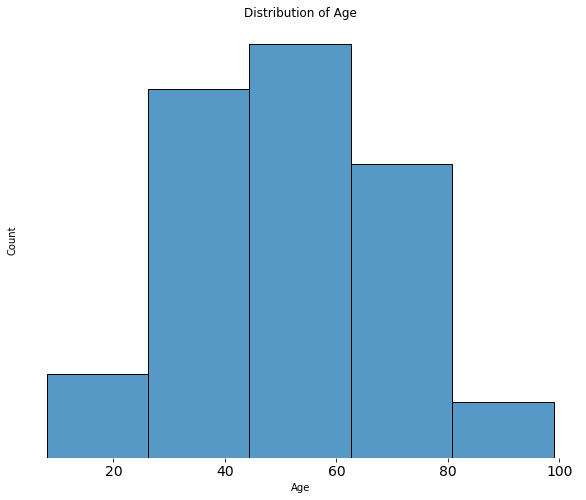

In [19]:
#checking distribution of age 

fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(data=finaldata, x="DVAge",bins=5)
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.xticks(fontsize=14,rotation=0)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])
plt.show()

In [20]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
finaldata['Gender from household grid']= label_encoder.fit_transform(finaldata['Gender from household grid']) 
print(finaldata.head())

  Household id  pnum  weightage  Gender from household grid  \
0     11011202     1   0.828011                           0   
1     11011203     1   1.134924                           1   
2     11011207     1   0.745875                           0   
3     11011209     1   0.786025                           1   
4     11011210     1   0.816703                           0   

                 Economic activity status  DVAge  \
0  In paid employment (full or part-time)     48   
1                                 Retired     75   
2                                 Retired     68   
3  In paid employment (full or part-time)     69   
4            Looking after family or home     29   

                                      Marital status How related to person 2  \
0  Married and living with your/his/her husband/wife                  Spouse   
1  Married and living with your/his/her husband/wife                  Spouse   
2  Married and living with your/his/her husband/wife                

In [21]:
from sklearn.preprocessing import StandardScaler
x = finaldata.iloc[:, 14:158].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [22]:
np.mean(x),np.std(x)

(-3.536290904093356e-18, 0.9999999999999999)

In [23]:
# Create a pca object with the 2 components as a parameter
pca = decomposition.PCA(n_components=2)
# Fit the PCA and transform the data
x_pca = pca.fit_transform(x)

In [24]:
X = finaldata.iloc[:,14:158]

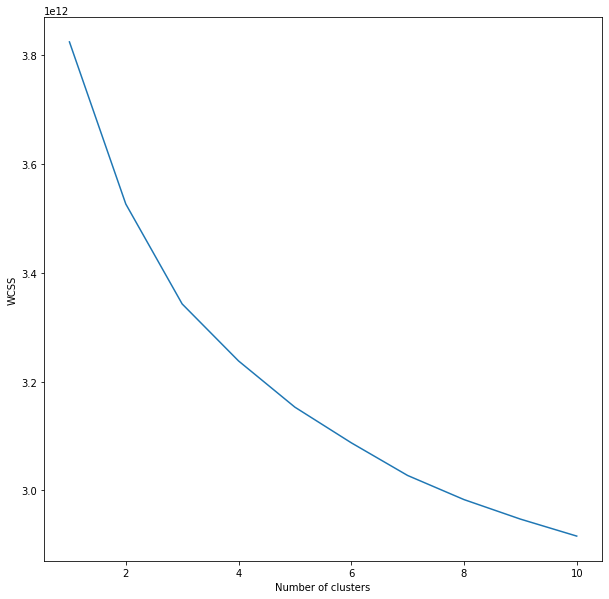

In [25]:
#elbow method to find k
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(X)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
pca = PCA(2)
data = pca.fit_transform(X)

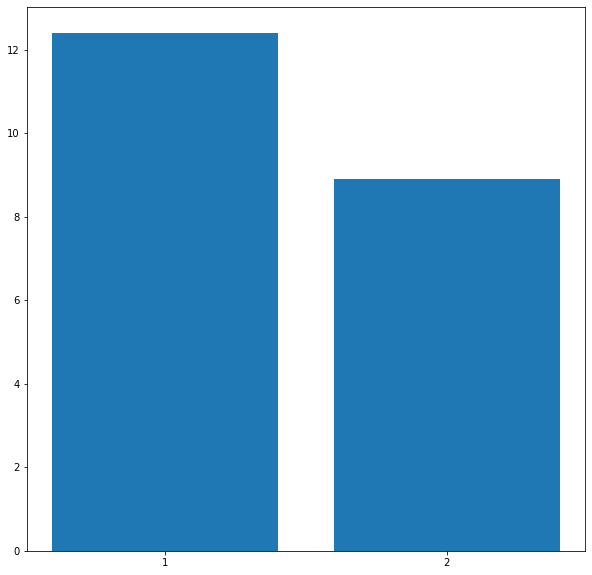

In [27]:
#checking variance of two principal components
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(X) for X in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

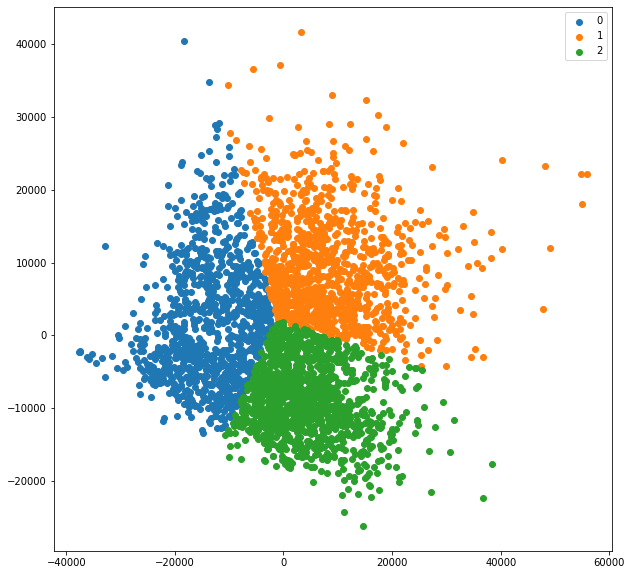

In [28]:
#applying k-means
model = KMeans(n_clusters = 3, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.legend()
plt.show()

Text(0, 0.5, 'Second principle component')

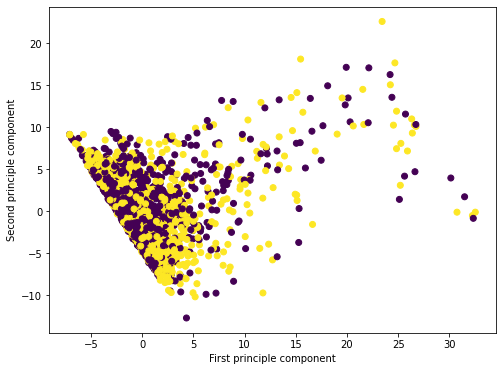

In [29]:
#plotiing pca data for gender base analysis
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=finaldata['Gender from household grid'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [30]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

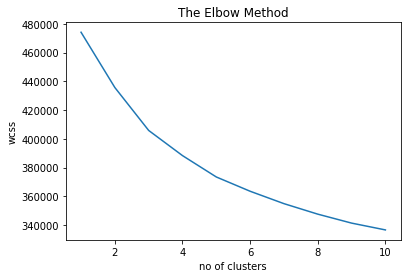

In [31]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [32]:
km=cluster.KMeans(n_clusters=3)
km.fit(x)
km.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int32)

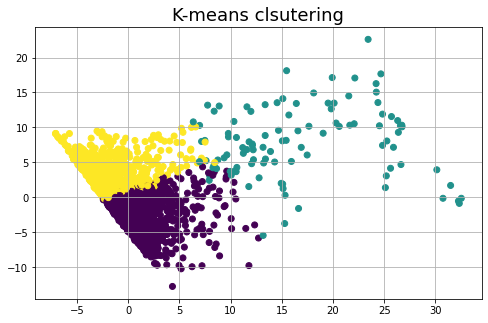

In [33]:
#k means plot
plt.figure(figsize=(8,5))
plt.title("K-means clsutering", fontsize=18)
plt.grid(True)
plt.scatter(x_pca[:,0],x_pca[:,1],c=km.labels_)
plt.savefig('CLUSTERING OUTPUT.png', dpi=300)
plt.show()

In [34]:
# sil=[]
# for j in range(2,11):
#     kmeans=KMeans(n_clusters=j,init='k-means++',random_state=42)
#     kmeans.fit(x)
#     labels=kmeans.labels_
#     centroids=kmeans.cluster_centers_
#     sil.append(silhouette_score(x, labels, metric='euclidean'))

In [35]:
# x=np.arange(2,11)
# plt.plot(x,sil)
# plt.scatter(x,sil)
# plt.xlabel("Number of Clusters")
# plt.ylabel("Silhouette Score")

In [36]:
clf_final=KMeans(n_clusters=3,random_state=42,init='k-means++')

In [37]:
clf_final.fit(x)

KMeans(n_clusters=3, random_state=42)

In [38]:
finaldata["Clusters"]=clf_final.predict(x)

In [39]:
finaldata.head()

,Household id,pnum,weightage,Gender from household grid,Economic activity status,DVAge,Marital status,How related to person 2,Citizenship: UK citizen,Number of adults in household,Number of children in household,Number of people in Household,Number of cars or vans,Total monthly household income,act1_1,act1_2,act1_3,act1_4,act1_5,act1_6,act1_7,act1_8,act1_9,act1_10,act1_11,act1_12,act1_13,act1_14,act1_15,act1_16,act1_17,act1_18,act1_19,act1_20,act1_21,act1_22,act1_23,act1_24,act1_25,act1_26,act1_27,act1_28,act1_29,act1_30,act1_31,act1_32,act1_33,act1_34,act1_35,act1_36,act1_37,act1_38,act1_39,act1_40,act1_41,act1_42,act1_43,act1_44,act1_45,act1_46,act1_47,act1_48,act1_49,act1_50,act1_51,act1_52,act1_53,act1_54,act1_55,act1_56,act1_57,act1_58,act1_59,act1_60,act1_61,act1_62,act1_63,act1_64,act1_65,act1_66,act1_67,act1_68,act1_69,act1_70,act1_71,act1_72,act1_73,act1_74,act1_75,act1_76,act1_77,act1_78,act1_79,act1_80,act1_81,act1_82,act1_83,act1_84,act1_85,act1_86,act1_87,act1_88,act1_89,act1_90,act1_91,act1_92,act1_93,act1_94,act1_95,act1_96,act1_97,act1_98,act1_99,act1_100,act1_101,act1_102,act1_103,act1_104,act1_105,act1_106,act1_107,act1_108,act1_109,act1_110,act1_111,act1_112,act1_113,act1_114,act1_115,act1_116,act1_117,act1_118,act1_119,act1_120,act1_121,act1_122,act1_123,act1_124,act1_125,act1_126,act1_127,act1_128,act1_129,act1_130,act1_131,act1_132,act1_133,act1_134,act1_135,act1_136,act1_137,act1_138,act1_139,act1_140,act1_141,act1_142,act1_143,act1_144,strata,psu,Episode time,Primary activity,Other activity 1,Other activity 2,Other activity 3,Location of activity,Whether used smartphone/tablet/laptop,Activity performed alone,activity With spouse/partner,activity With mother,activity With father,activity With child 0-7 years,activity With other person(s) (incl. child 8+ years),activity With other(s) you know outside of HH,activity With No co-presence reported,Level of enjoyment,Age Category,Age-Group,Clusters
0,11011202,1,0.828011,0,In paid employment (full or part-time),48,Married and living with your/his/her husband/wife,Spouse,Yes,3,1,4,4,3000,110,110,110,110,110,110,110,110,110,110,110,8219,310,3210,3110,7241,210,3819,210,210,210,3310,3210,3210,3210,3210,3110,3110,3110,3110,7259,5140,5140,5140,5140,5140,7259,7259,7259,7259,7259,7259,3110,5140,5140,8120,8120,8120,8120,8120,8120,8120,8120,8120,210,210,210,210,210,210,9360,9360,9360,9360,9360,9360,3610,3610,3610,3610,3610,3610,3240,3240,3110,3110,3110,3110,7220,7220,7220,7220,7220,7220,210,210,210,210,210,8210,8210,8210,8210,8210,8210,8210,3130,3130,3130,3130,3130,5110,7220,7220,7220,7220,7220,7220,5110,5110,5110,5110,5110,5110,5110,5110,5110,5110,7220,7220,7220,7220,7220,7220,7220,7220,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,117,110,Sleep,NaN,NaN,nan,Home,not using device,Not reported,Reported,Not reported,Not reported,Not reported,Reported,Not reported,Co-presence reported,Very Much,40 to 60,Old-aged Adults,1
1,11011203,1,1.134924,1,Retired,75,Married and living with your/his/her husband/wife,Spouse,Yes,2,0,2,2,2500,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,111,3110,5120,5120,210,5120,5120,5120,210,300,300,300,300,3710,9890,9890,9890,3440,3440,3440,3440,3440,9890,9890,9890,9890,3110,210,210,210,210,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210,5120,210,210,8210,8210,8210,8210,8210,8210,8210,8210,8210,8110,3110,3110,3110,3110,7241,7241,7241,7241,3110,210,210,210,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210,7241,7241,7241,7241,7241,3430,3430,310,8120,8120,8120,110,110,110,110,110,110,110,110,110,110,110,110,300,110,110,110,110,110,110,110,110,300,110,110,110,110,110,117,210,Sleep,NaN,NaN,nan,Home,not using device,Not reported,Reported,Not reported,Not reported,Not reported,Not reported,Reported,Co-presence reported,Very Much,60 >,Old-aged Adults,1
2,11011207,1,0.745875,0,Retired,68,Married and living with your/his/her husband/wife,Spous

In [40]:
finaldata["Clusters"].value_counts()

1    1914
2    1275
0     104
Name: Clusters, dtype: int64

In [41]:
finaldata["Economic activity status"].value_counts()

In paid employment (full or part-time)    1538
Retired                                    936
Self employed                              245
Looking after family or home               214
Unemployed                                 135
Long-term sick or disabled                 104
Full-time student                           72
On maternity leave                          30
Doing something else                        14
Item not applicable                          4
On a government training scheme              1
Name: Economic activity status, dtype: int64

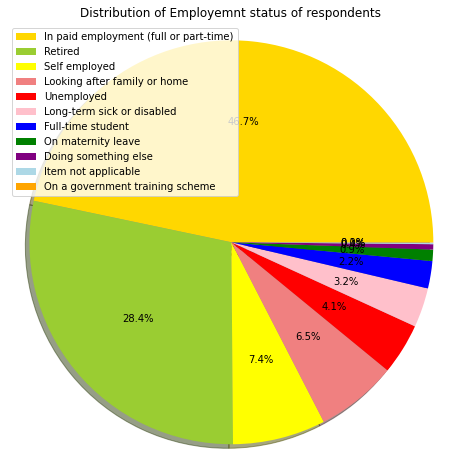

In [58]:
#distribution of employment status
fig, ax = plt.subplots(figsize=(8,8))
workstatus = [1538,936,245,214,135,104,72,30,14,4,1]
colors_list = ['gold','yellowgreen','yellow', 'lightcoral','red','pink','blue','green','purple','lightblue','orange']
my_labels = 'In paid employment (full or part-time)','Retired','Self employed','Looking after family or home','Unemployed','Long-term sick or disabled','Full-time student','On maternity leave','Doing something else','Item not applicable','On a government training scheme'
plt.pie(workstatus,autopct='%1.1f%%',shadow=True,colors=colors_list)
plt.title('Distribution of Employemnt status of respondents', y=1.) 
plt.legend(labels=my_labels, loc='upper left') 
plt.axis('equal')
plt.show()

In [44]:
#if activity between these values then group them as below
def groupByAct(row):
    if row['act1_16'] > 0 and row['act1_16'] <= 390:
        val = "Personal care activities"
    elif row['act1_16'] >=1000 and row['act1_16'] <=1399:
        val = "Employment related activies"
    elif row['act1_16'] >=2000 and row['act1_16'] <=2210:
        val = "Study related activites"
    elif row['act1_16'] >=3000 and row['act1_16'] <=3590:
        val = "Household and Family care activites"
    elif row['act1_16'] >=3600 and row['act1_16'] <=3726:
        val = "Shopping related activites"
    elif row['act1_16'] >=3727 and row['act1_16'] <=3929:
        val = "Childcare activites"
    elif row['act1_16'] >=4000 and row['act1_16'] <=4390:
        val = "Volunteer work and meetings related activites"
    elif row['act1_16'] >=5000 and row['act1_16'] <=5310:
        val = "Social Life and Entertainment related activites"
    elif row['act1_16'] >=6000 and row['act1_16'] <=6312:
        val = "Physical Exercise and Sports related activites"
    elif row['act1_16'] >=7000 and row['act1_16'] <=7390:
        val = "Hobbies, Games and Computing related activites"
    elif row['act1_16'] >=8000 and row['act1_16'] <=8320:
        val = "Mass media, TV, Radio, Reading related activites"
    elif row['act1_16'] >=9000 and row['act1_16'] <=9890:
        val = "Travel related activites"
    else:
        val = "Other activities"
    return val

In [45]:
finaldata['Activities-Group'] = finaldata.apply(groupByAct, axis=1)

In [46]:
finaldata[["act1_130", "Activities-Group"]].head(10)

,act1_130,Activities-Group
0,110,"Hobbies, Games and Computing related activites"
1,110,Personal care activities
2,110,Personal care activities
3,110,Travel related activites
4,110,Personal care activities
5,110,Personal care activities
6,110,Personal care activities
7,110,Travel related activites
8,9960,Personal care activities
9,110,Personal care activities


In [47]:
finaldata.columns

Index(['Household id', 'pnum', 'weightage', 'Gender from household grid',
       'Economic activity status', 'DVAge', 'Marital status',
       'How related to person 2', 'Citizenship: UK citizen',
       'Number of adults in household',
       ...
       'activity With father', 'activity With child 0-7 years',
       'activity With other person(s) (incl. child 8+ years)',
       'activity With other(s) you know outside of HH',
       'activity With No co-presence reported', 'Level of enjoyment',
       'Age Category', 'Age-Group', 'Clusters', 'Activities-Group'],
      dtype='object', length=180)

In [48]:
Travel_activities = finaldata[finaldata["Activities-Group"] == 'Travel related activites']

In [ ]:
Travel_activities.head()

([], <a list of 0 Text major ticklabel objects>)

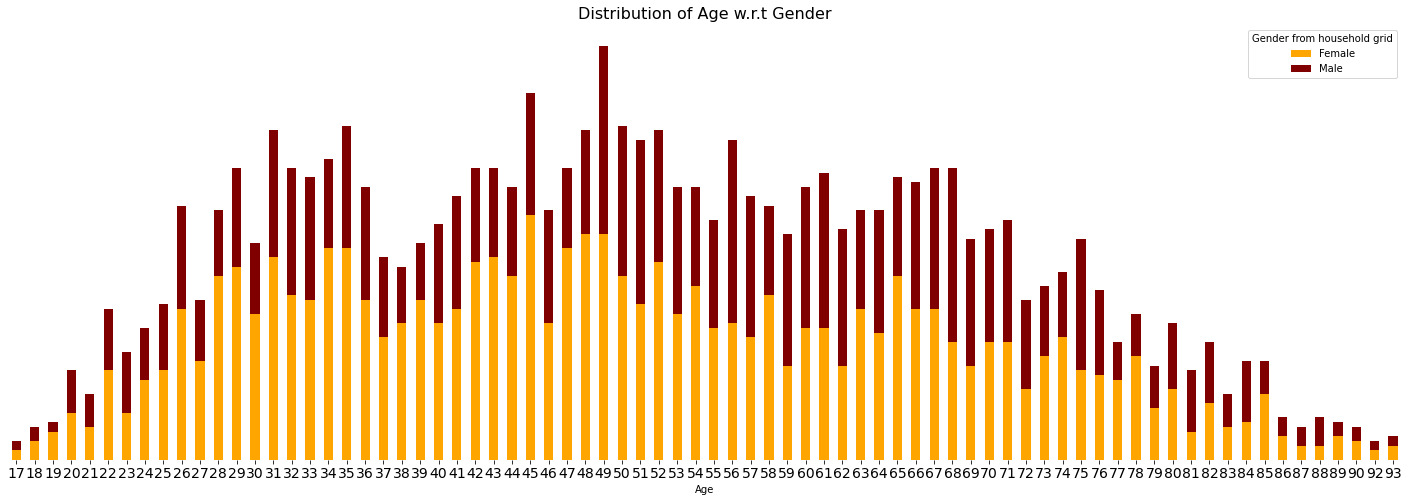

In [50]:
i=finaldata[['Gender from household grid','DVAge']].groupby(['DVAge','Gender from household grid']).size().unstack('Gender from household grid').sort_values(by='DVAge')
i.dropna(inplace=True)
i.rename(index={0:'j', 1:'j'}, columns={0:'Female', 1:'Male'}, inplace = True)
colors_list = ['orange','maroon']
#fig = plt.subplots(figsize=(8,8))
ax = i.plot(kind='bar', stacked=True,color = colors_list,figsize=(25,8))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
#     ax.text(x+width/2, 
#             y+height/2, 
#             '{:.0f}'.format(height), 
#             horizontalalignment='center', 
#             verticalalignment='center')
plt.xlabel('Age')
plt.title("Distribution of Age w.r.t Gender",fontsize= 16)
plt.xticks(fontsize=14,rotation=0)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

In [51]:
finaldata["Activities-Group"].value_counts()

Personal care activities                            2788
Household and Family care activites                  125
Mass media, TV, Radio, Reading related activites      93
Travel related activites                              81
Employment related activies                           71
Other activities                                      39
Childcare activites                                   33
Hobbies, Games and Computing related activites        27
Physical Exercise and Sports related activites        12
Social Life and Entertainment related activites       12
Volunteer work and meetings related activites         11
Study related activites                                1
Name: Activities-Group, dtype: int64

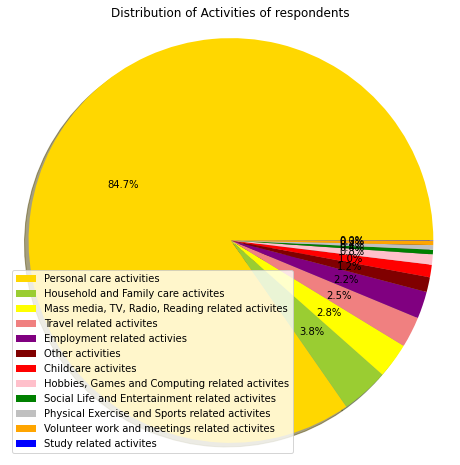

In [60]:
#distribution of activites
fig, ax = plt.subplots(figsize=(8,8))
education = [2788,125,93,81,71,39,33,27,12,12,11,1]
colors_list = ['gold','yellowgreen','yellow', 'lightcoral','purple','maroon','red','pink','green','silver','orange','blue']
my_labels = 'Personal care activities','Household and Family care activites','Mass media, TV, Radio, Reading related activites','Travel related activites','Employment related activies','Other activities','Childcare activites','Hobbies, Games and Computing related activites','Social Life and Entertainment related activites','Physical Exercise and Sports related activites','Volunteer work and meetings related activites','Study related activites'
plt.pie(education,autopct='%1.1f%%',shadow=True,colors=colors_list)
plt.title('Distribution of Activities of respondents', y=1.) 
plt.legend(labels=my_labels, loc='lower left') 
plt.axis('equal')
plt.show()

In [53]:
#if income between these values then group them as below
def groupByincome(row):
    if row['Total monthly household income'] > 0 and row['Total monthly household income'] <= 4000:
        val = "Low income Household"
    elif row['Total monthly household income'] >=4000 and row['Total monthly household income'] <=8000:
        val = "Average income Household"
    elif row['Total monthly household income'] >=8000 and row['Total monthly household income'] <=12000:
        val = "High income Household"
    else:
        val = "No income mentioned"
    return val

In [54]:
finaldata['Income-Group'] = finaldata.apply(groupByincome, axis=1)

In [55]:
finaldata[["Total monthly household income", "Income-Group"]].tail(20)

,Total monthly household income,Income-Group
3273,10000,High income Household
3274,5000,Average income Household
3275,2000,Low income Household
3276,900,Low income Household
3277,4500,Average income Household
3278,3200,Low income Household
3279,460,Low income Household
3280,6000,Average income Household
3281,530,Low income Household
3282,7000,Average income Household


In [56]:
finaldata["Income-Group"].value_counts()

Low income Household        2871
Average income Household     318
No income mentioned           62
High income Household         42
Name: Income-Group, dtype: int64

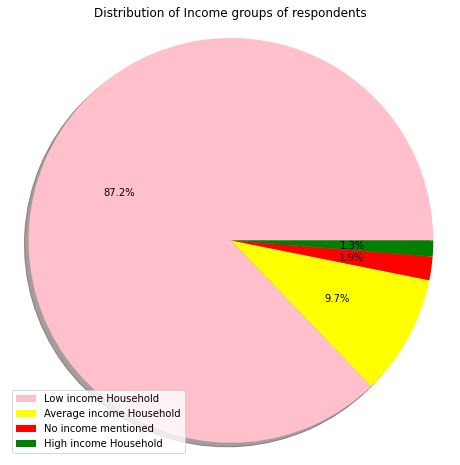

In [59]:
fig, ax = plt.subplots(figsize=(8,8))
education = [2871,318,62,42]
colors_list = ['pink','yellow','red','green']
my_labels = 'Low income Household','Average income Household','No income mentioned','High income Household'
plt.pie(education,autopct='%1.1f%%',shadow=True,colors=colors_list)
plt.title('Distribution of Income groups of respondents', y=1.) 
plt.legend(labels=my_labels, loc='lower left') 
plt.axis('equal')
plt.show()